# Summative Assessment: Programming for Artificial Intelligence 771768

## Data Preprocessing



#### Student Name: Alex Humphery Kwesi Afful
##### Student number: 202353550                                                                                          

## Data Processing

In [1]:
import csv
import json

### Exercise 1: Loading the file to python

In [2]:
with open("acw_user_data.csv", mode="r") as file:
    csv_file=csv.reader(file,delimiter=",")

    line_no=0
    for line_no,line in enumerate(csv_file):
        if line_no==0:
            headers=line
        line_no+=0
print(f"There are {line_no} customers")   # I Checked the number of lists(rows) for the entire data set 
print("\n")
print(headers)
print("\n")
print("There are %d headers" %(len(headers), ) )  #print number of headers 

There are 1000 customers


['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)', 'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


There are 23 headers


### Exercise 2: Converting from flat structure(lists) to nested structure(List of dictionaries)

In [3]:
#Initialize an empty list, where each dictonary created at each iteration is appended.

data=[]

def get_Address ():   # create a function to encapsulate some Address objects
    Street=line[0]
    City=line[1]
    Postcode=line[2]

    Address = [str(Street),str(City),str(Postcode)] # ccombines all objects as a list
    return Address           #return a list of all objects

def Credit_Card():
    start_date=line[6]
    end_date=line[7]
    cre_card_number=line[8]
    security_code=line[9]
    IBAN=line[12]

    credit_info= [str(start_date),str(end_date),str(cre_card_number),str(security_code),str(IBAN)]
    return credit_info

def get_Vehicle():
    make=line[19]
    model=line[20]
    year=line[21]
    type_=line[22]

    vehicle= [str(make),str(model),str(year),str(type_)]
    return vehicle
        
# Read the CSV file
with open('acw_user_data.csv', mode='r') as file1:
    csv_file1 = csv.reader(file1, delimiter=",")

    
        
    for line_no,line in enumerate(csv_file1):
        if line_no==0:
            continue  
            
        nested_data= {                         #created a dictionary to temporarily gather information
                "First Name": line[11],
                "Last Name":line[13],
                "Age(Years)":int(line[3]),
                "Sex":line[18],
                "Retired":line[16],
                "Marital Status":line[14],
                "Dependants":line[10],
                "Yearly Salary(Dollar)":float(line[17]),
                "Yearly Pension(Dollar)":float(line[15]),
                "Employer Company":line[5],
                "Distance Commuted to Work(Km)":float(line[4]),
                "Vehicle": get_Vehicle(),
                "Credit Card": Credit_Card(),
                "Address": get_Address(),
         
        }
            
        data.append(nested_data)             # appends the information to list( data ) after each iteration

print("There are %d customers" %(len(data), ))  # To confirm the number of rows which have been converted to dictionaries
#print("\n")
#print(data)

There are 1000 customers


### Exercise 3: Identifying rows of all unknown dependant values

In [4]:
data1=[]

missing_values = []

with open('acw_user_data.csv', mode='r') as file2:
    csv_file2 = csv.reader(file2, delimiter=",")

            
    for line_no, line in enumerate(csv_file2):
        if line_no == 0:
            continue
        
        if line[10] == "": # If any row in column 10 is empty, assign zero to it
            line[10]= "0"   # replaces the bank cell with zero
            missing_values.append(line_no) #append the line_no to list (missing_values)
       
        nested_data= {                         #created a dictionary to temporarily gather information
                "First Name": line[11],
                "Last Name":line[13],
                "Age(Years)":int(line[3]),
                "Sex":line[18],
                "Retired":line[16],
                "Marital Status":line[14],
                "Dependants":line[10],
                "Yearly Salary(Dollar)":float(line[17]),
                "Yearly Pension(Dollar)":float(line[15]),
                "Employer Company":line[5],
                "Distance Commuted to Work(Km)":float(line[4]),
                "Vehicle": get_Vehicle(),
                "Credit Card": Credit_Card(),
                "Address": get_Address(),
         
        }
        data1.append(nested_data)
        
print(f"Problematic rows for dependants: {missing_values}")
#print("\n")
#print(data1)

Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


### Exercise 4: Write all records to a `processed.json` file in the JSON format

In [5]:
data1
with open("processed.json",mode="w") as file3:
    json.dump(data1,file3)        # writes list of dictionaries as json file

### Exercise 5: Creating two groups for retired and employed customers

In [6]:
retired=[]
employed=[]

with open("processed.json",mode="r") as file4:
    file_reader=json.load(file4)

    for line_no,line in enumerate(file_reader):   # go through each line/dictionary
        
        if line["Retired"] =="True":             # if retired status is True
    
            retired.append(line)                 #append it to list retired
        else:
            employed.append(line)                # else append to list employed
#print(retired)
print("There are %d retired customers" %(len(retired),) )
print("There are %d employed customers" %(len(employed),) ) #prints number of employed and retired customers
    
with open("retired.json",mode="w") as file00:        #writes the retired_file as a json file
    json.dump(retired,file00)

with open("employed.json",mode="w") as file01:
    json.dump(employed,file01)

There are 246 retired customers
There are 754 employed customers


### Exercise 6

#### 6A : Gather line numbers of customers with more than 10 years card 

In [7]:
# initiate an empty list to gather line numbers
#I would want to use this list so i keep it out of the context manager scope

more_than_10=[]

def Calc_years(start_date,end_date):                               # Function to calculate years
    start_date_breakdown=start_date.split("/")        # splits MM/YY into two components
    start_month = int(start_date_breakdown[0])        # First component is for month
    start_year = int(start_date_breakdown[1])         # second is for year
            
    end_date_breakdown=end_date.split("/")       
    end_month = int(end_date_breakdown[0])
    end_year = int(end_date_breakdown[1])

    card_span = (end_year - start_year) + (end_month - start_month)/12    
    # consider difference in years and the fraction of months in years to get total number of years
    return card_span                               

with open("acw_user_data.csv",mode="r") as file02:   #open up the csv file back to python
    file_read=csv.reader(file02, delimiter = ",")
    
    for line_no, line in enumerate(file_read):       # for every row no and row, perform the following tasks below
        if line_no==0:                              # skips row 0 which contains headers
            continue
              
        card_life_span = Calc_years(line[6],line[7])

        if card_life_span > 10:
            more_than_10.append(int(line_no))

print(f"The following row numbers have more than 10 years card: {more_than_10}")
print("\n")
print("There are %d clients that have more than 10 years between start and end year date" %(len(more_than_10), ) )


The following row numbers have more than 10 years card: [2, 7, 8, 16, 24, 31, 33, 35, 36, 41, 42, 52, 53, 54, 56, 57, 64, 69, 73, 76, 77, 82, 86, 87, 88, 92, 102, 107, 111, 114, 115, 118, 123, 134, 135, 137, 138, 143, 148, 156, 162, 165, 169, 179, 180, 183, 191, 194, 199, 202, 219, 221, 227, 230, 231, 236, 248, 252, 253, 261, 262, 264, 266, 272, 277, 282, 287, 288, 299, 306, 309, 311, 312, 314, 318, 319, 320, 322, 328, 329, 330, 331, 332, 345, 347, 348, 350, 352, 358, 363, 365, 371, 378, 390, 391, 392, 394, 397, 400, 404, 406, 409, 413, 414, 419, 422, 423, 425, 434, 435, 439, 447, 450, 453, 455, 465, 468, 469, 475, 477, 482, 486, 493, 498, 499, 501, 505, 506, 508, 512, 513, 515, 517, 521, 529, 531, 532, 541, 552, 553, 555, 565, 567, 574, 575, 587, 589, 595, 597, 600, 605, 607, 608, 612, 621, 623, 627, 628, 630, 631, 644, 648, 656, 659, 664, 665, 671, 674, 695, 698, 699, 710, 713, 716, 717, 720, 722, 738, 743, 750, 751, 753, 756, 757, 762, 768, 770, 777, 778, 779, 780, 781, 782, 783, 78

#### 6B : Write customers with more than 10 years to removed__ccard.json file

In [8]:
# initiate an empty list to gather customers to be removed
more_than_10         # Call list of rows needed

remove=[]

with open("acw_user_data.csv",mode="r") as r_file:  
    r_file_read=csv.reader(r_file, delimiter = ",")
    
    def get_Address (line):   # create a function to encapsulate some Address objects
        Street=line[0]
        City=line[1]
        Postcode=line[2]

        Address = [str(Street),str(City),str(Postcode)]
        return Address

    def Credit_Card(line):
         start_date=line[6]
         end_date=line[7]
         cre_card_number=line[8]
         security_code=line[9]
         IBAN=line[12]

         credit_info= [str(start_date),str(end_date),str(cre_card_number),str(security_code),str(IBAN)]
         return credit_info

    def get_Vehicle(line):
        make=line[19]
        model=line[20]
        year=line[21]
        type_=line[22]

        vehicle= [str(make),str(model),str(year),str(type_)]
        return vehicle
        
    for line_no,line in enumerate(r_file_read):       # for every row no and row, perform the following tasks below
        if line_no==0:                               # skips row 0 which contains headers
            continue
            
        if line_no in more_than_10:               # for each line_no in the list of more than 10 years collected
            
            nested_data= {                         #created a dictionary to temporarily gather information
                "First Name": line[11],
                "Last Name":line[13],
                "Age(Years)":int(line[3]),
                "Sex":line[18],
                "Retired":line[16],
                "Marital Status":line[14],
                "Dependants":line[10],
                "Yearly Salary(Dollar)":float(line[17]),
                "Yearly Pension(Dollar)":float(line[15]),
                "Employer Company":line[5],
                "Distance Commuted to Work(Km)":float(line[4]),
                "Vehicle": get_Vehicle(line),
                "Credit Card": Credit_Card(line),
                "Address": get_Address(line),
         
            }
            remove.append(nested_data)        # append to the list remove
    #print(remove)           # used this to check remove list
    #print(len(remove))       # to check if i still had 222 customers


with open("remove_ccard.json",mode="w") as w_file:   #write list of dictionaries to remove_ccard.json file
    json.dump(remove,w_file)

### Exercise 7

### Gather all commuting distance to explore it's range

In [9]:
### Get a list of all commuting distances to explore it's range

with open("processed.json",mode="r") as d_file:
    d_file_reader=json.load(d_file)

    distance=[] 

    for line in d_file_reader:
        #print(line)
        distance.append(line['Distance Commuted to Work(Km)'])
    #print(distance)

#### Determine minimum and maximum values which will help me in classification 

In [10]:
import numpy as np

x=np.array(distance)
print("Minimum value :", x.min())
print("Maximun value:", x.max()) 

Minimum value : 0.0
Maximun value: 20.34


In [11]:
len(d_file_reader)

1000

#### 7A: Creating the "Salary-Commute" attribute

In [12]:
commute=[]      # Created an empty list to hold dictionary items
 
with open("processed.json",mode="r") as d_file1:
    d_file1_reader=json.load(d_file1)
    
    def get_salary(distance,salary):
        if  distance <= 1:
            return salary
            
        elif 1 < distance <= 2:
            return salary*1.01
            
        elif 2 < distance <= 3:
            return salary*1.02
            
        elif 3 < distance <= 4:
            return salary*1.03
            
        elif 4 < distance <= 5:
            return salary*1.04
            
        elif 5 < distance <= 6:
            return salary*1.05
            
        elif 6 < distance <= 7:
            return salary*1.06
            
        elif 7 < distance <= 8:
            return salary*1.07
            
        elif 8 < distance <= 9:
            return salary*1.08
            
        elif 9 < distance <= 10:
            return salary*1.09
            
        elif 10 < distance <= 11:
            return salary*1.10  
            
        elif 11 < distance <= 12:
            return salary*1.11
            
        elif 12 < distance <= 13:
            return salary*1.12
            
        elif 13 < distance <= 14:
            return salary*1.13
            
        elif 14 < distance <= 15:
            return salary*1.14
            
        elif 15 < distance <= 16:
            return salary*1.15
            
        elif 16 < distance <= 17:
            return salary*1.16
            
        elif 17 < distance <= 18:
            return salary*1.17
            
        elif 18 < distance <= 19:
            return salary*1.18
            
        elif 19 < distance <= 20:
            return salary*1.19
        else:
            return salary*1.20
        
    for i in range(len(d_file1_reader)):
        distance = d_file1_reader[i]['Distance Commuted to Work(Km)']
        salary = d_file1_reader[i]["Yearly Salary(Dollar)"]
        
        frame_data = {                                                         #created a dictionary to gather information temporarily
                "First Name":d_file1_reader[i]['First Name'],
                "Last Name":d_file1_reader[i]['Last Name'],
                "Age(Years)":d_file1_reader[i]['Age(Years)'],
                "Sex":d_file1_reader[i]['Sex'],
                "Retired":d_file1_reader[i]['Retired'],
                "Marital Status":d_file1_reader[i]['Marital Status'],
                "Dependants":d_file1_reader[i]['Dependants'],
                "Yearly Salary(Dollar)":d_file1_reader[i]['Yearly Salary(Dollar)'],
                "Salary-Commute(Dollar)": get_salary(distance,salary),
                "Yearly Pension(Dollar)":d_file1_reader[i]['Yearly Pension(Dollar)'],
                "Employer Company":d_file1_reader[i]['Employer Company'],
                "Distance Commuted to Work(Km)":d_file1_reader[i]['Distance Commuted to Work(Km)'],
                "Vehicle":d_file1_reader[i]['Vehicle'],
                "Credit Card":d_file1_reader[i]['Credit Card'],
                "Address":d_file1_reader[i]['Address'],
         
        }
            
        commute.append(frame_data)   
                           
print(commute)


[{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age(Years)': 89, 'Sex': 'Male', 'Retired': 'True', 'Marital Status': 'married or civil partner', 'Dependants': '3', 'Yearly Salary(Dollar)': 72838.0, 'Salary-Commute(Dollar)': 72838.0, 'Yearly Pension(Dollar)': 7257.0, 'Employer Company': 'N/A', 'Distance Commuted to Work(Km)': 0.0, 'Vehicle': ['Hyundai', 'Bonneville', '2009', 'Pickup'], 'Credit Card': ['08/18', '11/27', '676373692463', '875', 'GB62PQKB71416034141571'], 'Address': ['70 Lydia isle', 'Lake Conor', 'S71 7XZ']}, {'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age(Years)': 46, 'Sex': 'Male', 'Retired': 'False', 'Marital Status': 'married or civil partner', 'Dependants': '1', 'Yearly Salary(Dollar)': 54016.0, 'Salary-Commute(Dollar)': 61038.079999999994, 'Yearly Pension(Dollar)': 0.0, 'Employer Company': 'Begum-Williams', 'Distance Commuted to Work(Km)': 13.72, 'Vehicle': ['Nissan', 'ATS', '1996', 'Coupe'], 'Credit Card': ['08/12', '11/26', '4529436854129855', '583', 'GB37

#### 7B: Sorting records by "Salary-Commute (Ascending order)

In [13]:
commute

def order_salary_commute(commute):
    return commute['Salary-Commute(Dollar)']

commute_sorted=sorted(commute,key=order_salary_commute)
commute_sorted

[{'First Name': 'Carly',
  'Last Name': 'Lloyd',
  'Age(Years)': 89,
  'Sex': 'Female',
  'Retired': 'True',
  'Marital Status': 'single',
  'Dependants': '2',
  'Yearly Salary(Dollar)': 17080.0,
  'Salary-Commute(Dollar)': 17080.0,
  'Yearly Pension(Dollar)': 14877.0,
  'Employer Company': 'N/A',
  'Distance Commuted to Work(Km)': 0.0,
  'Vehicle': ['Audi', 'MR2', '1993', 'SUV'],
  'Credit Card': ['04/20',
   '08/22',
   '4449413745622080',
   '032',
   'GB20YNUQ40766287388345'],
  'Address': ['Flat 86 Abigail mount', 'North Emilystad', 'G0F 8GG']},
 {'First Name': 'Justin',
  'Last Name': 'Martin',
  'Age(Years)': 91,
  'Sex': 'Male',
  'Retired': 'True',
  'Marital Status': 'married or civil partner',
  'Dependants': '3',
  'Yearly Salary(Dollar)': 17800.0,
  'Salary-Commute(Dollar)': 17800.0,
  'Yearly Pension(Dollar)': 33017.0,
  'Employer Company': 'N/A',
  'Distance Commuted to Work(Km)': 0.0,
  'Vehicle': ['Porsche', 'XC60', '1999', 'Van/Minivan'],
  'Credit Card': ['12/12',
  

#### 7C: Saving the output file out as a JSON format, for a commute.json file

In [14]:
commute_sorted

with open("commute.json",mode="w") as j_file:
    json.dump(commute_sorted,j_file)
    

## DATA VISUALISATION

### Exercise 1

#### Data Series for Salary and Age

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv("acw_user_data.csv")
#df

In [17]:
headers=df.columns
print(headers)   # generated headers to help filter for dataSeries

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (Km)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)',
       'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')


In [18]:
salary=df['Yearly Salary (Dollar)']  # Salary Data Series
salary

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (Dollar), Length: 1000, dtype: int64

In [19]:
age=df['Age (Years)']      # Age Data Series
age

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

#### 1A : Mean Salary

In [20]:
mean_salary=salary.mean()
print(f"The mean salary is : {mean_salary}")

The mean salary is : 57814.078


#### 1B : Median Age

In [21]:
median_age=age.median()
print(f"The median age is : {median_age}")

The median age is : 54.0


### Exercise 2 : Univariate Plots

##### 2a : Univariate plot for Age (Determine no of bins for bin_width=5 )

In [22]:
# Range = number of bins * binwidth 
# Hence: Number of bins= range/ binwidth   

# 1: Redefine dataFrame for Age only
data_age=df['Age (Years)']  # extract DataSeries to a new name
dataframe_age=pd.DataFrame(data_age)   #Make it a new data frame

# 2: Calculate the range of age
age_min=dataframe_age['Age (Years)'].min()
print(f"The minimum age: {age_min}")

age_max=dataframe_age['Age (Years)'].max()
print(f"The maximum age: {age_max}")

age_range=age_max-age_min
print(f"The range of age: {age_range}")
print("\n")
# 3: Calculate the number of bins
bin_width=5
number_bins=age_range/bin_width
print(f"The number of bins: {number_bins}")

The minimum age: 18
The maximum age: 91
The range of age: 73


The number of bins: 14.6


Text(0.5, 1.0, 'Histogram showing Age Distribution')

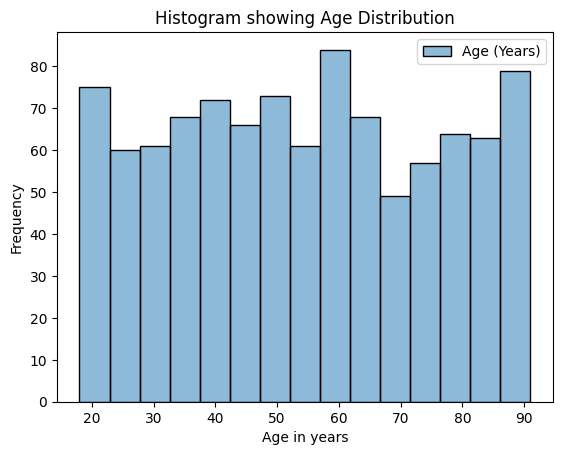

In [23]:
%matplotlib inline

age_plot=sns.histplot(data=dataframe_age,bins=15,binwidth=5)
age_plot.set_xlabel("Age in years")
age_plot.set_ylabel("Frequency")
age_plot.set_title("Histogram showing Age Distribution")

##### 2b : Univariate plot for Dependents fixing all errors with seaborn

In [24]:
dep=df['Dependants'] # extract Series 
dep_data=pd.DataFrame(dep) # Make it a DataFrame

In [25]:
print(dep_data['Dependants'].unique()) #check distinct figures 


[ 3.  1.  2.  4. nan  5.]


In [26]:
### Can see "nan" objects and would want to change all to zero

dep_data['Dependants'].fillna(value=0,inplace=True)
dep_data['Dependants'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_952\287148043.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dep_data['Dependants'].fillna(value=0,inplace=True)


array([3., 1., 2., 4., 0., 5.])

In [27]:
#can see dependants appears as floating numbers and want to change to intergers

dep_data['Dependants']=dep_data['Dependants'].astype(int)
print(dep_data['Dependants'].dtype)
dep_data['Dependants'].unique()

int64


array([3, 1, 2, 4, 0, 5])

Text(0.5, 1.0, 'Graph Showing Dependants Distribution')

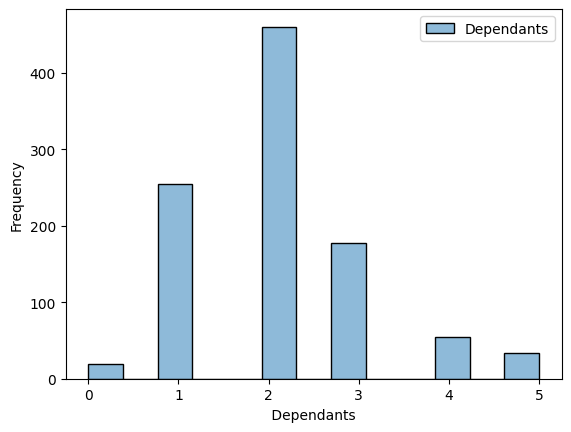

In [28]:
%matplotlib inline

dep_plot=sns.histplot(data=dep_data)
dep_plot.set_xlabel(" Dependants ")
dep_plot.set_ylabel("Frequency")
age_plot.set_title("Graph Showing Dependants Distribution")

##### 2c : Univariate plot for Age conditioned on Marital Status

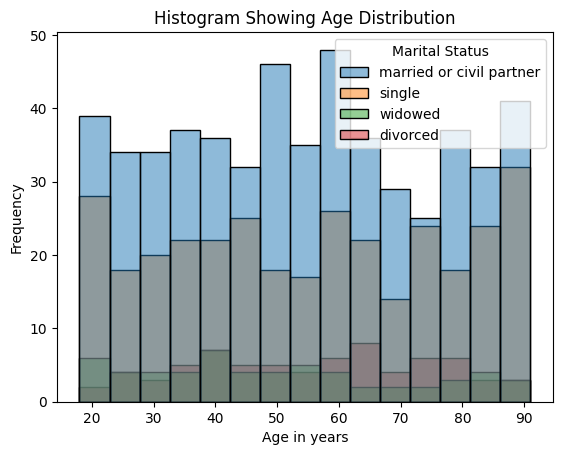

In [29]:
%matplotlib inline

age_plot1=sns.histplot(data=df, x="Age (Years)", hue="Marital Status",binwidth=5)
age_plot1.set_xlabel("Age in years")
age_plot1.set_ylabel("Frequency")
age_plot1.set_title("Histogram Showing Age Distribution")
plt.show()

### Exercise 3: Multivariate Plots

##### 3a: Commuted distance against Salary

In [30]:
print(df["Distance Commuted to Work (Km)"].dtype)
print(df["Yearly Salary (Dollar)"].dtype)

float64
int64


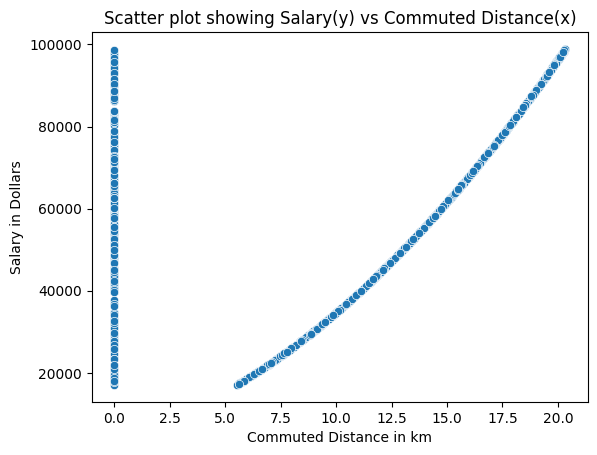

In [31]:
%matplotlib inline

dis_sal=sns.scatterplot(data=df, x="Distance Commuted to Work (Km)", y="Yearly Salary (Dollar)")
dis_sal.set_xlabel("Commuted Distance in km")
dis_sal.set_ylabel("Salary in Dollars")
dis_sal.set_title("Scatter plot showing Salary(y) vs Commuted Distance(x)")
plt.show()

##### 3b: Age against Salary

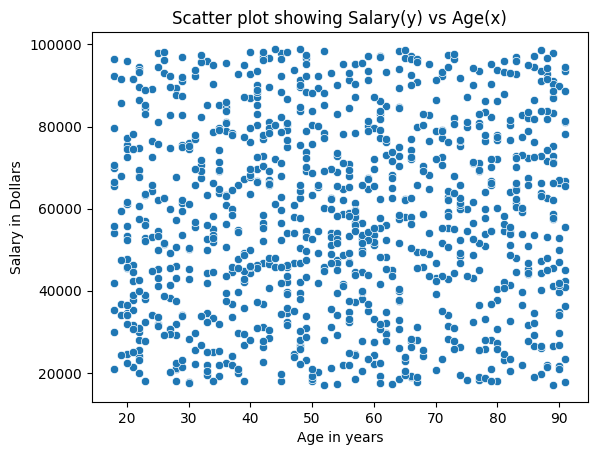

In [32]:
%matplotlib inline

age_vs_sal_plot=sns.scatterplot(data=df, x="Age (Years)", y="Yearly Salary (Dollar)")
age_vs_sal_plot.set_xlabel("Age in years")
age_vs_sal_plot.set_ylabel("Salary in Dollars")
age_vs_sal_plot.set_title("Scatter plot showing Salary(y) vs Age(x)")
plt.show()

##### 3c: Age against Salary conditioned by dependents

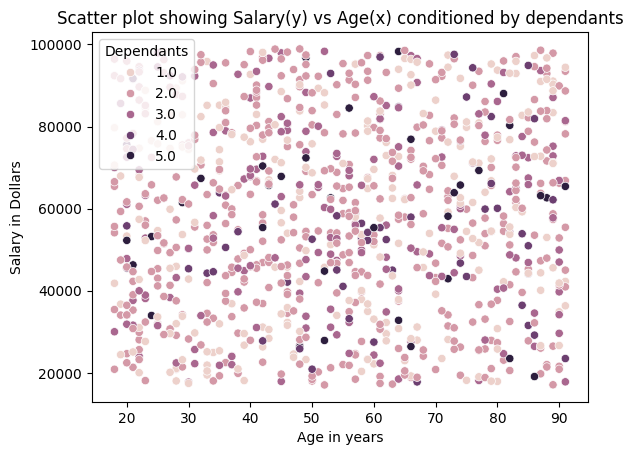

In [33]:
%matplotlib inline

age_vs_sal_plot1=sns.scatterplot(data=df, x="Age (Years)", y="Yearly Salary (Dollar)",hue="Dependants")
age_vs_sal_plot1.set_xlabel("Age in years")
age_vs_sal_plot1.set_ylabel("Salary in Dollars")
age_vs_sal_plot1.set_title("Scatter plot showing Salary(y) vs Age(x) conditioned by dependants")
plt.show()

### Exercise 4

In [35]:
figures_save={}  #create an empty dictionary to store plots

figures_save["./hist_age_plot"]=age_plot   #append each plot to dictionary 
figures_save["./hist_dependants_plot"]=dep_plot
figures_save["./hist_age_plot2"]=age_plot1
figures_save["./dist_salary_plot"]=dis_sal
figures_save["./age_salary_plot"]=age_vs_sal_plot
figures_save["./age_salary_plot2"]=age_vs_sal_plot1

for file_path,file in figures_save.items():   #iterate through dictionary to save all images
    fig=file.get_figure()
    fig.savefig(file_path)